In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
Music = pd.read_excel('Music_Instr_data.xlsx' )
Music.shape

(2247, 9)

# EDA

In [49]:
Music.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [50]:
Music = Music.rename({'reviewerID':'r_id', 'reviewerName':'r_name', 'reviewText':'r_text', 
               'unixReviewTime':'unix_r_time', 'reviewTime':'r_time'}, axis = 1)
Music.head()

,r_id,asin,r_name,helpful,r_text,overall,summary,unix_r_time,r_time
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [51]:
Music.isna().sum()

r_id           0
asin           0
r_name         8
helpful        0
r_text         0
overall        0
summary        0
unix_r_time    0
r_time         0
dtype: int64

In [52]:
# Concatinating review_text and summary
Music['reviews'] = Music['r_text'] + Music['summary']

# Dropping review_text and summary
Music = Music.drop(['r_text', 'summary'], axis = 1)
Music.head()

,r_id,asin,r_name,helpful,overall,unix_r_time,r_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [53]:
# Splitting date coloumn into month ,date and year

new = Music['r_time'].str.split(',', n=1, expand=True)
Music['date']= new[0]
Music['year']= new[1]
Music= Music.drop(['r_time'], axis=1)
Music.head()

,r_id,asin,r_name,helpful,overall,unix_r_time,reviews,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"Not much to write about here, but it does exac...",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,The product does exactly as it should and is q...,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,The primary job of this device is to block the...,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,Nice windscreen protects my MXL mic and preven...,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,This pop filter is great. It looks and perform...,02 21,2014


In [54]:
# Splitting the date

new1= Music['date'].str.split(' ', n=1, expand=True)
Music['month']= new1[0]
Music['day']= new1[1]
Music= Music.drop(['date'], axis=1)
Music.head()

,r_id,asin,r_name,helpful,overall,unix_r_time,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"Not much to write about here, but it does exac...",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,The product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,The primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,Nice windscreen protects my MXL mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,This pop filter is great. It looks and perform...,2014,02,21


In [55]:
# Splitting dataset based on comma and square bracket

new1= Music['helpful'].str.split(',', n=1, expand=True)
new2= new1[0].str.split('[', n=1, expand=True)
new3= new1[1].str.split(']', n=1, expand=True)

new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

helpful = pd.concat([new2, new3], axis=1)

In [56]:
helpful

,1,0
0,0,0
1,13,14
2,1,1
3,0,0
4,0,0
...,...,...
2242,1,1
2243,1,1
2244,1,1
2245,1,1


In [57]:
# stripping all the values to find the rate
def trim_columns(df):
    
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

# Dividing the two columns
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
Music['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
Music=Music.drop(['helpful'], axis=1)

In [58]:
Music['helpful_rate'].value_counts()


0.00    1655
1.00     412
0.50      50
0.67      27
0.75      19
0.80       7
0.92       6
0.95       6
0.83       5
0.90       5
0.88       5
0.89       4
0.33       3
0.93       3
0.60       3
0.25       3
0.86       3
0.98       2
0.78       2
0.62       2
0.82       2
0.97       2
0.71       2
0.94       2
0.73       2
0.40       1
0.11       1
0.87       1
0.29       1
0.65       1
0.58       1
0.09       1
0.76       1
0.44       1
0.79       1
0.30       1
0.81       1
0.96       1
0.07       1
0.85       1
Name: helpful_rate, dtype: int64

In [59]:
# Removing not important columns
Music=Music.drop(['r_name','unix_r_time'], axis=1)
#Creating a copy 
clean_reviews=Music.copy()

# Text Cleaning

In [63]:
import re

In [64]:
def Music_cleaning(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [65]:
Music['reviews'] = Music['reviews'].apply(lambda x: Music_cleaning(x))

In [66]:
Music.head()

,r_id,asin,overall,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5,not much to write about here but it does exact...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5,the product does exactly as it should and is q...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5,the primary job of this device is to block the...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5,nice windscreen protects my mxl mic and preven...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5,this pop filter is great it looks and performs...,2014,02,21,0.00


In [67]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [68]:
Music['reviews'] = Music['reviews'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
Music.head()

,r_id,asin,overall,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5,not much write but exactly supposed filters po...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5,product exactly quite affordablei not realized...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5,primary job device block breath would otherwis...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5,pop filter great looks performs like studio fi...,2014,02,21,0.00


# Sentiment values for reviews

In [69]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [70]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [72]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [73]:
Music['sentiment_value'] = Music['reviews'].apply(calculate_sentiment)
Music

,r_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value
0,A2IBPI20UZIR0U,1384719342,5,not much write but exactly supposed filters po...,2014,02,28,0.00,0
1,A14VAT5EAX3D9S,1384719342,5,product exactly quite affordablei not realized...,2013,03,16,0.93,1
2,A195EZSQDW3E21,1384719342,5,primary job device block breath would otherwis...,2013,08,28,1.00,-1
3,A2C00NNG1ZQQG2,1384719342,5,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00,4
4,A94QU4C90B1AX,1384719342,5,pop filter great looks performs like studio fi...,2014,02,21,0.00,5
...,...,...,...,...,...,...,...,...,...
2242,A1U3T27RHRIDYN,B0002GJ6FC,5,great little tool assist replacing strings cle...,2014,01,14,1.00,9
2243,A2TSUJLFHB61W3,B0002GJ6FC,5,works great changing strings ones guitar compa...,2014,01,27,1.00,6
2244,A3IY9JZZ36OQSV,B0002GJ6FC,5,makes restringing way easier pretty stable stu...,2014,04,9,1.00,5
2245,A2D0F87RY5YMHN,B0002GJ6FC,5,needed tool changing strings guitars especiall...,2013,02,27,1.00,4


In [74]:
# Number of words in sentence
Music['word_count'] = Music['reviews'].str.split().apply(len)
Music['word_count']

0       25
1       55
2       48
3       22
4       21
        ..
2242    18
2243    22
2244    19
2245    41
2246    23
Name: word_count, Length: 2247, dtype: int64

In [75]:
Music.sort_values(by='sentiment_value')

,r_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
957,A8ANJNZAZQ6IQ,B0002D0COE,4,thought would throw twocents new design effect...,2014,01,21,1.00,-13,340
515,A3S737ZGWE1GKY,B0002CZVXM,4,bought dunlop trust brand dont even mind sorta...,2013,08,5,0.00,-11,82
544,A3FW4THIMBIN6V,B0002CZVXM,2,disappointed quality engineering product worka...,2011,06,1,0.78,-10,228
1964,A1UMN04FQ6H32D,B0002F519I,4,pricevery reasonable price docomfortthese stay...,2014,05,18,0.00,-10,88
687,A2IDOKLAT1MP8X,B0002D01KO,2,title states lightly padded duffle bag nothing...,2011,06,26,0.44,-9,58
...,...,...,...,...,...,...,...,...,...,...
1483,A1TSKKBNV38E8Y,B0002E1O2M,3,hesitate write review simply pretty obvious ne...,2014,02,5,0.00,54,184
355,A1SG6JGU7ISEH3,B0002CZUTM,5,playing guitar since years old decades must sa...,2012,01,19,0.67,56,165
1887,A1QDSJZQWJZOL1,B0002E4Z8M,5,need know mic directional must keep mouth swee...,2011,08,11,1.00,59,620
1884,A2KI91IR3RA7D0,B0002E4Z8M,5,looking consider best friend voice ever year b...,2012,11,29,1.00,62,621


In [76]:
Music['sentiment_value'].max()

140

In [77]:
Music[Music['sentiment_value']==140]

,r_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
412,A27L5L6I7OSV5B,B0002CZV82,2,greg abrams review entitled but tone snobs rev...,2011,06,30,0.95,140,713


In [78]:
Music['reviews'][412]

'greg abrams review entitled but tone snobs review down products pagealright want get good if somewhat basic distortion sound less deali strongly disagree find much better distortions less even near mark currently priced ative played guitar years like many people one first pedal purchases afterall everyone talks theyre available given music store nation hear famous musicians using plus actually pretty cheap snapped one like everyone else come find something popular doesnt always mean good see nickelback transformers movie franchise kardashian family etcso plugged didnt really care distortion harsh thin artificial sounding always noisy tried amps practic amp solid state fender frontman big amp tube halfstack not diverse basic sound not likeable ive read japanese made better sound newer made taiwan models but either way not great pedal mindbut like many newer players didnt know better time fast forward years ive bought sold literally dozens pedals whole world great tones found if keep ey

In [79]:
Music['sentiment_value'].describe()

count    2247.000000
mean        6.572764
std         7.596510
min       -13.000000
25%         2.000000
50%         5.000000
75%         9.000000
max       140.000000
Name: sentiment_value, dtype: float64

In [80]:
Music[Music['sentiment_value']<=0]

,r_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
0,A2IBPI20UZIR0U,1384719342,5,not much write but exactly supposed filters po...,2014,02,28,0.00,0,25
2,A195EZSQDW3E21,1384719342,5,primary job device block breath would otherwis...,2013,08,28,1.00,-1,48
7,AJNFQI3YR6XJ5,B00004Y2UT,3,use cable run output pedal chain input fender ...,2012,11,16,0.00,0,87
12,A2NIT6BKW11XJQ,B00005ML71,3,if not use using large sustaining pedal playin...,2013,11,17,0.00,0,16
28,A2CCGGDGZ694CT,B000068NVI,4,hosa xlr cables affordable heavily madei large...,2012,07,11,1.00,-2,29
...,...,...,...,...,...,...,...,...,...,...
2215,AGDWVRFL81B4O,B0002GIRP2,5,well theres definitely detail missing mids but...,2007,12,14,0.87,-3,43
2223,AE9C0UNXBV8CB,B0002GJ3E6,5,unit wider handle inexpensive string winders i...,2014,03,11,0.00,0,21
2226,A1ROUMJOGO4QMB,B0002GJ3E6,3,works feels little light wind getting tension ...,2014,02,24,0.00,-3,23
2232,A27E9UEA5ZMTN5,B0002GJ3ZA,2,far slippery fingers shredding tip wears way f...,2014,07,4,0.00,0,12


# Visualization 

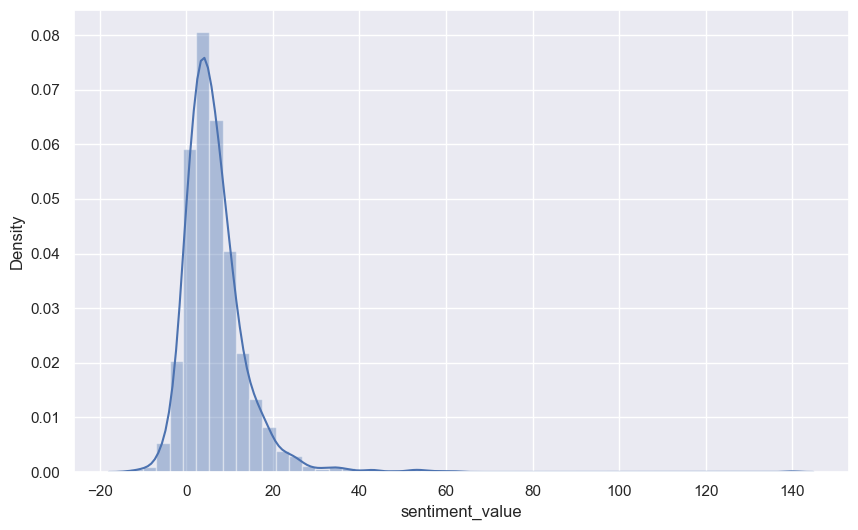

In [81]:
# Distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(Music['sentiment_value']);

In [82]:
range(0,len(Music))

range(0, 2247)

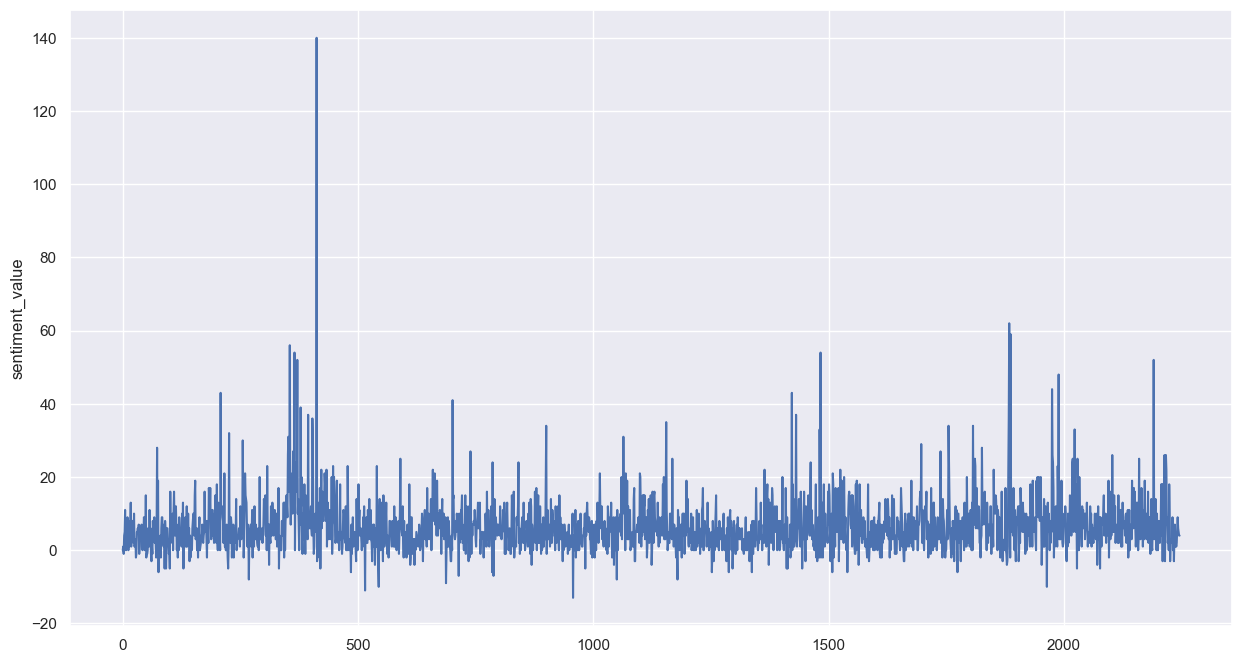

In [83]:
plt.figure(figsize=(15, 8))
sns.lineplot(y='sentiment_value',x=range(0,len(Music)),data=Music);

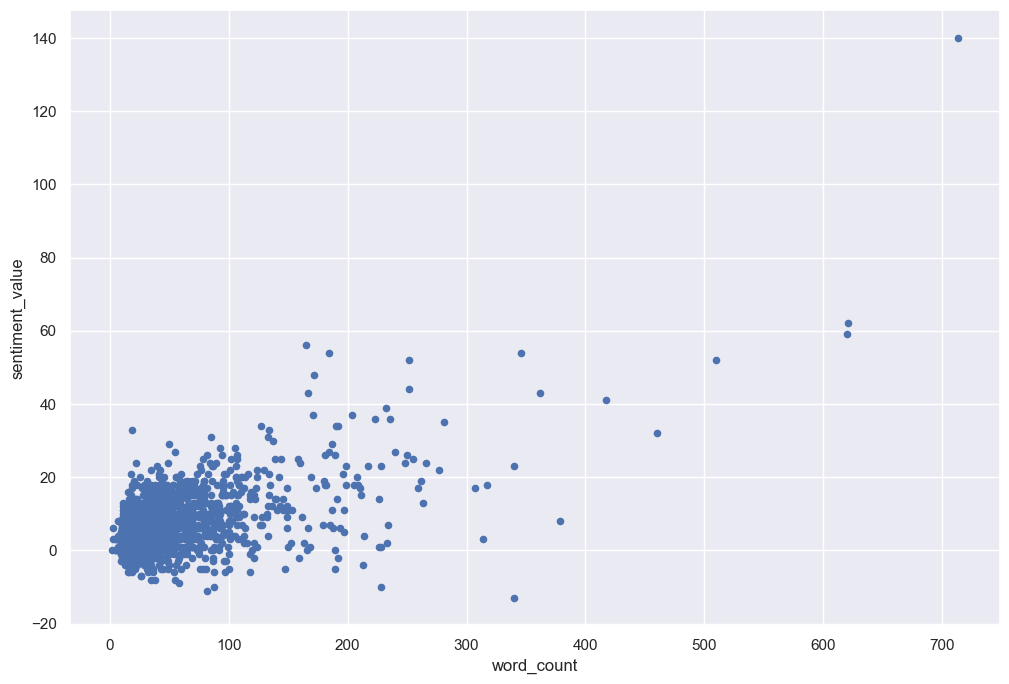

In [84]:
Music.plot.scatter(x='word_count', y='sentiment_value', figsize=(12,8));